## Business Understanding

>>
An electricity generation company supplies electricity to a place in the southern Hemisphere of the world. It is hoping to streamline its power creation dependent on the authentic power utilization of its residents. 
>>
As a data scientist, you are required to look into the past electricity consumption and different climatic information, and come up with a model that can learn the trend in consumption. The company has provided data that is on an hourly basis spanning 5 years.



>>
**What is the benefit from improving the power consumption short-term forecast?**
>>
To avoid situations where demand exceeds available supply, pricing on the wholesale electricity market is organized in a way to incentivize participants to plan their consumption and production precisely.

## Data Understanding

>>
**Dataset Description**
>>
The dataset has 8 variables: ID, temperature, pressure, windspeed, var1, var2, datetime, and electricity consumption (in MWh). The training set will have the first 23 days of every month, and the test set will have the 24th day to the end of the month. 

**Install Libraries**

In [ ]:
!pip install bar_chart_race

     |████████████████████████████████| 163kB 4.5MB/s 


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.8MB/s 


In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 4.9MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 3.1MB 29kB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 604kB 39.3MB/s 
     |████████████████████████████████| 296kB 41.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=d47971970d5ea1d338177523825e334917ed8188297896b29fc9243669e36a65
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=bd23ed0fb9c4e98fed59ffb22cb3f8b362828b908227af2d12befa39ba66eced
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Unin

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 12.9MB 105kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Import necessary libraries.
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

# Loading Plotting libraries.
#
plt.style.use("ggplot") # Set plot style
# Plotly Tools
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
init_notebook_mode(connected=True)
# Import Necessary Packages.
#
import cufflinks as cf
import pandas_profiling as pp
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

import IPython

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the Dataset.

In [ ]:
# Load the dataset
#
energy = pd.read_csv("Copy of train_6BJx641.csv")
profile = pp.ProfileReport(energy)

profile

In [ ]:
# Preview the top 5 rows.
#
energy.head()

ID             datetime  ...  var2  electricity_consumption
0   0  2013-07-01 00:00:00  ...     A                    216.0
1   1  2013-07-01 01:00:00  ...     A                    210.0
2   2  2013-07-01 02:00:00  ...     A                    225.0
3   3  2013-07-01 03:00:00  ...     A                    216.0
4   4  2013-07-01 04:00:00  ...     A                    222.0

[5 rows x 8 columns]

In [ ]:
# Preview bottom 5 rows.
#
energy.tail()

ID             datetime  ...  var2  electricity_consumption
26491  34891  2017-06-23 19:00:00  ...     A                    225.0
26492  34892  2017-06-23 20:00:00  ...     A                    213.0
26493  34893  2017-06-23 21:00:00  ...     A                    213.0
26494  34894  2017-06-23 22:00:00  ...     A                    210.0
26495  34895  2017-06-23 23:00:00  ...     A                    210.0

[5 rows x 8 columns]

> Our dataframe has about 26495 rows.
> Lets check for the size of the dataframe to confirm this.

In [ ]:
# Check the size of the dataframe.
#
energy.shape

(26496, 8)

> The dataframe has an actual size of 26496 Rows and 8 Columns.

## Data Cleaning

In [ ]:
# Check for null values.
#
energy.isna().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

>>
The dataset does not have any null values. 

**Duplicated Values**

In [ ]:
# Check for Duplicates values.
#
energy.duplicated().sum()

0

>>
We also don't have duplicated variables in our dataset.

>>
We can now split the 'datetime' column into two columns.
>>
These columns are
>>
* Date
* Time

>>
The reason as to why we are splitting this column is due to the fact that we need to analyze how electricity consumption varies on an hourly basis. 


## Exploratory Data Analysis

**Datetime**

In [ ]:
# Split the datatime column into two columns and add them to the dataframe.
# These two columns are: date and time.
#
d = pd.to_datetime(energy['datetime'], infer_datetime_format=True)
energy['date'] = d.dt.date
energy['time'] = d.dt.time
print (energy)

          ID             datetime  ...        date      time
0          0  2013-07-01 00:00:00  ...  2013-07-01  00:00:00
1          1  2013-07-01 01:00:00  ...  2013-07-01  01:00:00
2          2  2013-07-01 02:00:00  ...  2013-07-01  02:00:00
3          3  2013-07-01 03:00:00  ...  2013-07-01  03:00:00
4          4  2013-07-01 04:00:00  ...  2013-07-01  04:00:00
...      ...                  ...  ...         ...       ...
26491  34891  2017-06-23 19:00:00  ...  2017-06-23  19:00:00
26492  34892  2017-06-23 20:00:00  ...  2017-06-23  20:00:00
26493  34893  2017-06-23 21:00:00  ...  2017-06-23  21:00:00
26494  34894  2017-06-23 22:00:00  ...  2017-06-23  22:00:00
26495  34895  2017-06-23 23:00:00  ...  2017-06-23  23:00:00

[26496 rows x 10 columns]


In [ ]:
energy.describe()

ID   temperature  ...     windspeed  electricity_consumption
count  26496.000000  26496.000000  ...  26496.000000             26496.000000
mean   17455.500000      5.098989  ...     23.959956               298.359601
std    10122.873673      8.682860  ...     48.280321               108.020555
min        0.000000    -17.100000  ...      1.075000               174.000000
25%     8717.750000     -2.900000  ...      3.155000               219.000000
50%    17435.500000      6.400000  ...      6.545000               267.000000
75%    26177.250000     12.100000  ...     22.260000               342.000000
max    34895.000000     23.600000  ...    586.600000              1386.000000

[8 rows x 6 columns]

> We observe that during the seventh month of the year we have a spike in electricity consumption.
>>
During the month of January we see a slightly lower record of electricity consumption.

**Drop datetime column**

In [ ]:
# Check for the shape of the new dataframe.
#
energy.shape

(26496, 10)

In [ ]:
data = energy

**Numerical Dataframe**

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric = data.select_dtypes(include=numerics)

**Categorical Dateframe**

In [ ]:
categorical = ['object']

category = data.select_dtypes(include=categorical)

### **Checking for outliers**

In [ ]:
data.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption', 'date', 'time'],
      dtype='object')

 Outliers:
 [[], [], []]


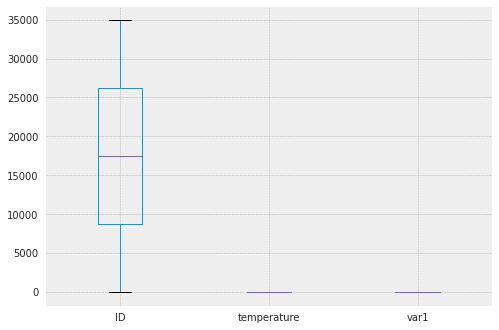

In [ ]:
plt.style.use('bmh')

# plotting outliers for the numeric columns
#
_t, cols = pd.DataFrame.boxplot(numeric.iloc[:, :-3], return_type='both')

outliers = [flier.get_ydata() for flier in cols['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Outliers:\n {out_list}")

 Outliers:
 [[1021.0, 1021.0, 1021.0, 1024.0, 1023.0, 1022.0, 1023.0], [571.91, 575.04, 578.435, 582.58, 586.6, 53.235, 56.365, 59.87, 63.515, 67.41, 72.08, 76.35, 52.66, 59.435, 68.235, 77.425, 86.255, 95.96, 105.9, 114.09, 124.795, 130.82, 138.72, 147.285, 156.475, 165.79, 174.355, 184.185, 193.5, 201.675, 210.615, 219.32, 228.51, 236.435, 245.485, 253.3, 260.95, 268.1, 275.775, 283.825, 289.51, 296.445, 303.995, 309.165, 314.085, 319.005, 322.775, 327.17, 334.195, 343.135, 351.825, 360.89, 368.955, 379.02, 386.195, 393.345, 401.37, 407.645, 414.455, 419.375, 423.42, 426.175, 431.32, 434.45, 438.62, 443.015, 447.535, 56.115, 64.555, 75.26, 84.965, 94.795, 102.97, 112.3, 122.255, 139.745, 152.08, 161.535, 173.855, 184.91, 198.37, 210.69, 221.87, 231.075, 244.02, 251.695, 257.38, 262.025, 269.95, 278.265, 286.955, 296.395, 305.71, 313.9, 322.825, 328.975, 336.375, 342.685, 346.73, 352.775, 356.17, 359.55, 363.32, 370.095, 377.245, 382.805, 391.745, 399.645, 404.94, 58.405, 65.705, 72.9

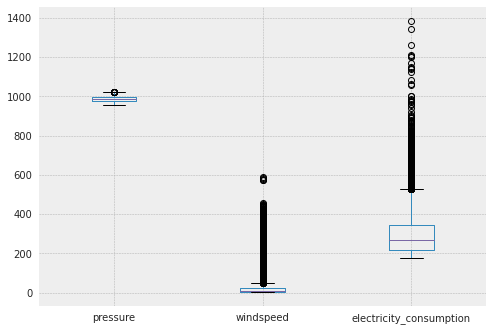

In [ ]:
plt.style.use('bmh')

# plotting outliers for the numeric columns
#
_t, cols = pd.DataFrame.boxplot(numeric.iloc[:, 3:], return_type='both')

outliers = [flier.get_ydata() for flier in cols['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Outliers:\n {out_list}")

> We have outliers in all the variables with electricity consumtion variable having the largest number of outliers.

In [ ]:
col = data.columns.tolist()

In [ ]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numeric:
    rows, columns = numeric.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numeric[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

ID has 0 outliers in total, which is 0.0% of data
temperature has 0 outliers in total, which is 0.0% of data
var1 has 0 outliers in total, which is 0.0% of data
pressure has 3 outliers in total, which is 0.011% of data
windspeed has 712 outliers in total, which is 2.7% of data
electricity_consumption has 489 outliers in total, which is 1.8% of data


In [ ]:
# Getting ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(numeric))
print(z)

# Dropping and Confirming that our outliers have been dropped from the dataset.
#
df_o = numeric[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

[[ 1.72439467  1.90021483  1.45652349  1.37883732 11.34955972  0.76245818]
 [ 1.72429588  1.98083494  1.66756148  0.79562161 11.41439067  0.81800421]
 [ 1.72419709  2.07297222  1.73470993  1.12888773 11.4847105   0.67913913]
 ...
 [ 1.72261649  0.74849887  1.05363279  0.71230508  0.77289768  0.79023119]
 [ 1.72271527  0.92125627  0.90974326  0.79562161  0.89582793  0.81800421]
 [ 1.72281406  0.82911899  0.90974326  1.8787365   0.99255653  0.81800421]]
Previous dataframe size : 26496
New dataframe size: 25294


### Visualization


**Plot Bar Plots for the counts of Categorical variable "Var2"**

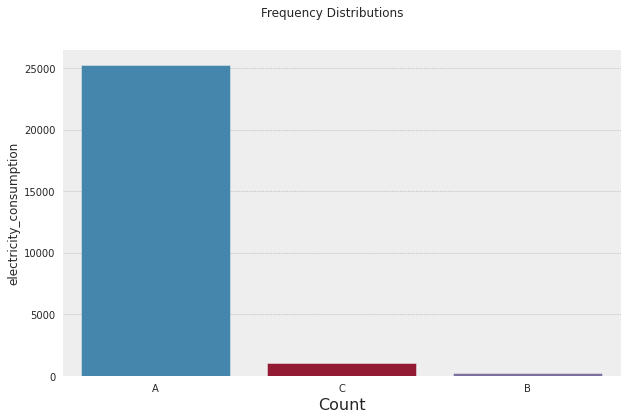

In [ ]:
# Plotting sublots for our categorical variables.
#
fig, (ax) = plt.subplots(figsize=(10, 6))
fig.suptitle('Frequency Distributions')

sns.barplot(data['var2'].value_counts().keys(), data['var2'].value_counts(), ax=ax)
plt.ylabel(col)
plt.xlabel('Count', fontsize=16)
      
plt.show()

In [ ]:
data["datetime"] = pd.to_datetime(data["datetime"])

#Date features
data["Hour"] = data["datetime"].dt.hour
data["Day"] = data["datetime"].dt.dayofweek
data["Month"] = data["datetime"].dt.month
data["Year"] = data["datetime"].dt.year
data["Q"] = data["datetime"].dt.quarter
data["Dayofyear"] = data["datetime"].dt.dayofyear
data["Dayofmonth"] = data["datetime"].dt.day
data["Weekofyear"] = data["datetime"].dt.weekofyear

data["Drop_me"] = data["datetime"].dt.strftime("%m-%d")

data.index = data["datetime"]
data = data.drop(["datetime"],axis=1)

In [ ]:
# Preview the top rows of the new dataframe.
#
data.head()

ID  temperature  var1  ...  Dayofmonth  Weekofyear Drop_me
datetime                                    ...                                
2013-07-01 00:00:00   0        -11.4 -17.1  ...           1          27   07-01
2013-07-01 01:00:00   1        -12.1 -19.3  ...           1          27   07-01
2013-07-01 02:00:00   2        -12.9 -20.0  ...           1          27   07-01
2013-07-01 03:00:00   3        -11.4 -17.1  ...           1          27   07-01
2013-07-01 04:00:00   4        -11.4 -19.3  ...           1          27   07-01

[5 rows x 18 columns]

Text(0.0, 1.0, 'Consumption distribution')

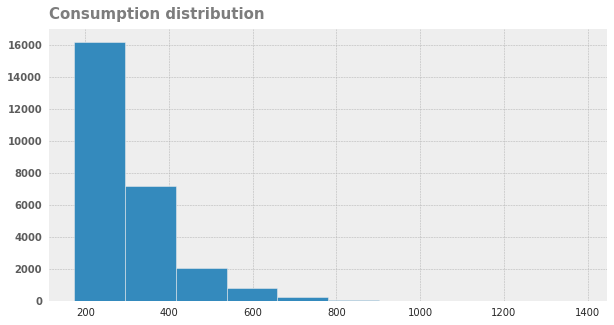

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))

plt.hist(data["electricity_consumption"])

plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("",alpha=0.75, weight="bold")
plt.ylabel("",alpha=0.75, weight="bold")

plt.title("Consumption distribution", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

> We can see that electricity consumption frequency plot is skewed to the left, with the majority of the consumption between 200MW and 400MW. 


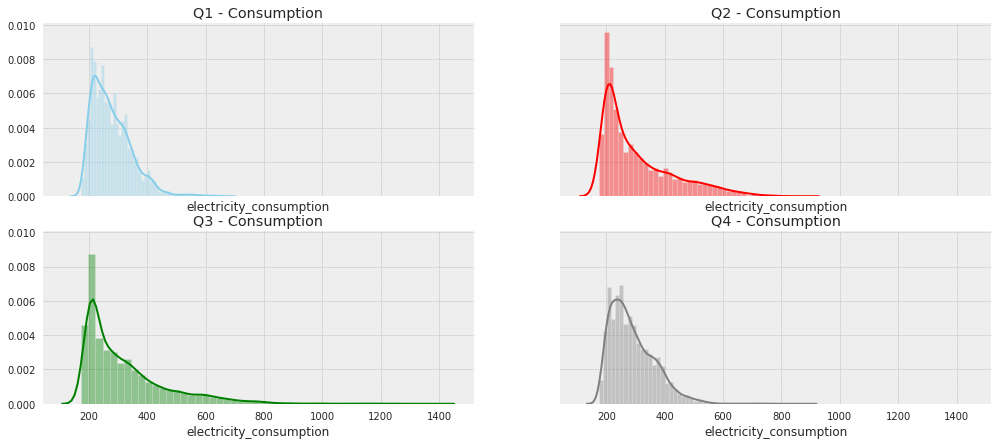

In [ ]:
#Data prep
Q1 = data[data["Q"]==1]
Q2 = data[data["Q"]==2]
Q3 = data[data["Q"]==3]
Q4 = data[data["Q"]==4]

#Plot
fig,axes = plt.subplots(2,2,figsize=(17,7),sharex=True,sharey=True)

sns.distplot(Q1["electricity_consumption"],color="skyblue", ax=axes[0,0]).set_title("Q1 - Consumption")
sns.distplot(Q2["electricity_consumption"],color="red", ax=axes[0,1]).set_title("Q2 - Consumption")
sns.distplot(Q3["electricity_consumption"],color="green", ax=axes[1,0]).set_title("Q3 - Consumption")
sns.distplot(Q4["electricity_consumption"],color="gray", ax=axes[1,1]).set_title("Q4 - Consumption")

del Q1, Q2, Q3, Q4

>>
The distribution of electricity consumption across all four quarters appears similar. 
>>
However, the fourth quater appears to have a wider distribution which may indicate that we have more higher values of electricity consumption.

**Mean of Daily Electricity Consumption**

Text(0.0, 1.0, 'Mean daily consumption')

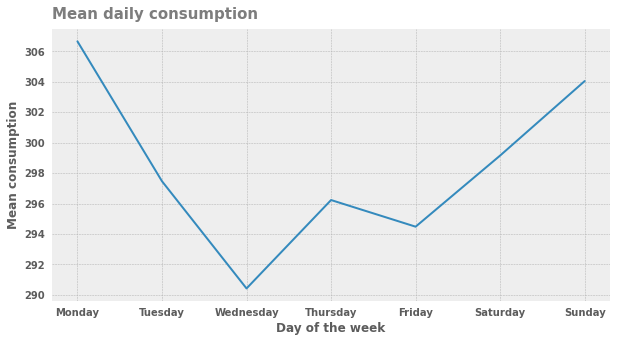

In [ ]:
#Data prep
mean_per_day = data.groupby("Day")["electricity_consumption"].agg(["mean"])

#Plot
fig, ax = plt.subplots(figsize=(10,5))


plt.plot(mean_per_day.index,mean_per_day["mean"])

plt.xticks(mean_per_day.index, ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"], alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Day of the week",alpha=0.75, weight="bold")
plt.ylabel("Mean consumption",alpha=0.75, weight="bold")

plt.title("Mean daily consumption", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

>>
There is an upward ttrend toward the end of the week in electricity consumption. 
>>
Electricity consumption increases from Friday up to Monday where consumption reduces.
>>
Therefore Wednesday has the least mean slightly above 290MW, while Monday has the highest consumption, slightly above 306MW.

**Mean of Hourly Electricity Consumption**

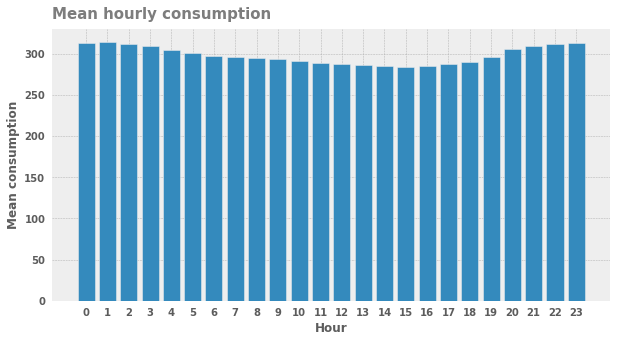

In [ ]:
#Data
mean_per_hour = data.groupby("Hour")["electricity_consumption"].agg(["mean"])

#Plot
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(mean_per_hour.index, mean_per_hour["mean"])

plt.xticks(range(24),alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Hour",alpha=0.75, weight="bold")
plt.ylabel("Mean consumption",alpha=0.75, weight="bold")

plt.title("Mean hourly consumption", alpha=0.60, weight="bold", fontsize=15, loc="left", pad=10)

del mean_per_hour

> We can clearly tell the peak and off-peak hours from the plot above. 

>>
We will add columns that will help train the model and help it predict future consumption.
>>
The categorical features added are:
>>
1. Holidays - I included some more famous Ugandan holidays.
>>
2. Worktime - If the half-hourly consumption demand happened during the usual worktime of most companies.
>>
3. Peak/Off-Peak - I diverted this feature from the EDA above.
>>
4. Weekend/NonWeekend - If the day is a working day or not. I am aware that this might be duplicating information as we have other columns that that indicate the exact day, but I would nonetheless like to cover all my bases.

In [ ]:
#Be ready for some bruteforce if functions
def feature_holidays(row):

    if row["Drop_me"] == "01-01":
        return "New Year"
    if row["Drop_me"] == "05-01":
        return "Labour Day"
    if row["Drop_me"] == "12-25":
        return "Christmas"
    return 'Other'
def feature_worktime(row):
    if row["Hour"] > 7 & row["Hour"] <= 17:
        return "Worktime"
    return "NonWorkTime"
def feature_peak(row):
    if row["Hour"] > 7 & row["Hour"] <= 22:
        return "Peak"
    return "NonPeak"
def feature_weekend(row):
    if row["Day"] == 5 or row["Day"] == 6:
        return "Weekend"
    return "NonWeekend"

In [ ]:
data["Holiday"] = data.apply (lambda row : feature_holidays(row), axis=1)
data["Work"] = data.apply(lambda row: feature_worktime(row), axis=1)
data["Peak"] = data.apply(lambda row: feature_peak(row), axis=1)
data["Weekend"] = data.apply(lambda row: feature_weekend(row), axis=1)

In [ ]:
data = data.drop(["Drop_me", "ID", "date", "time"],axis=1)
data.head()

temperature  var1  ...     Peak     Weekend
datetime                                ...                     
2013-07-01 00:00:00        -11.4 -17.1  ...  NonPeak  NonWeekend
2013-07-01 01:00:00        -12.1 -19.3  ...  NonPeak  NonWeekend
2013-07-01 02:00:00        -12.9 -20.0  ...  NonPeak  NonWeekend
2013-07-01 03:00:00        -11.4 -17.1  ...  NonPeak  NonWeekend
2013-07-01 04:00:00        -11.4 -19.3  ...  NonPeak  NonWeekend

[5 rows x 18 columns]

**Get Dummies**

In [ ]:
data.head()

temperature  var1  ...     Peak     Weekend
datetime                                ...                     
2013-07-01 00:00:00        -11.4 -17.1  ...  NonPeak  NonWeekend
2013-07-01 01:00:00        -12.1 -19.3  ...  NonPeak  NonWeekend
2013-07-01 02:00:00        -12.9 -20.0  ...  NonPeak  NonWeekend
2013-07-01 03:00:00        -11.4 -17.1  ...  NonPeak  NonWeekend
2013-07-01 04:00:00        -11.4 -19.3  ...  NonPeak  NonWeekend

[5 rows x 18 columns]

In [ ]:
 # Creating times grouped dataframes in order to analyse them
df_year = data.groupby('Year')['electricity_consumption'].sum()
df_month = data.groupby('Month', sort = False)['electricity_consumption'].sum()
df_week_of_year = data.groupby('Weekofyear')['electricity_consumption'].sum()
df_quarter = data.groupby('Q')['electricity_consumption'].sum()
df_day = data.groupby('Day', sort = False)['electricity_consumption'].sum()
df_day_of_year = data.groupby('Dayofyear')['electricity_consumption'].sum()
df_day_of_month = data.groupby('Dayofmonth')['electricity_consumption'].sum()
df_hour = data.groupby('Hour')['electricity_consumption'].sum()

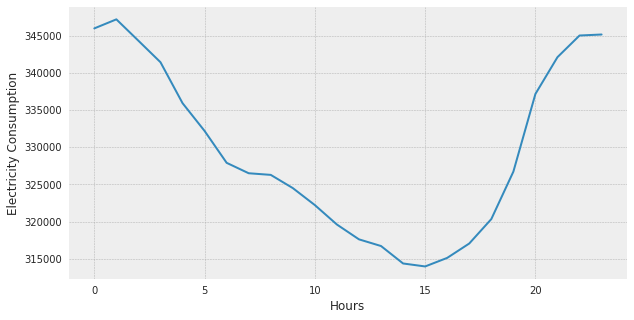

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df_hour)
plt.xlabel("Hours")
plt.ylabel("Electricity Consumption")
plt.show()

In [ ]:
data.to_csv("final_dataset.csv")

In [ ]:
df = pd.read_csv("final_dataset.csv")
df.head(2)

datetime  temperature  var1  ...         Work     Peak     Weekend
0  2013-07-01 00:00:00        -11.4 -17.1  ...  NonWorkTime  NonPeak  NonWeekend
1  2013-07-01 01:00:00        -12.1 -19.3  ...  NonWorkTime  NonPeak  NonWeekend

[2 rows x 19 columns]

In [ ]:
df.reset_index(inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df.head(2)

index  temperature  var1  ...         Work     Peak     Weekend
datetime                                       ...                                  
2013-07-01 00:00:00      0        -11.4 -17.1  ...  NonWorkTime  NonPeak  NonWeekend
2013-07-01 01:00:00      1        -12.1 -19.3  ...  NonWorkTime  NonPeak  NonWeekend

[2 rows x 19 columns]

### **Get Dummies**

In [ ]:
# Get Dummies.
#
cat = ['object']
cat = df.select_dtypes(include=cat)

for i in cat:
  df[i] = pd.get_dummies(df[i])

df.describe().T

count          mean  ...       75%      max
index                    26496.0  13247.500000  ...  19871.25  26495.0
temperature              26496.0      5.098989  ...     12.10     23.6
var1                     26496.0     -1.916233  ...      7.90     18.6
pressure                 26496.0    986.450615  ...    995.00   1024.0
windspeed                26496.0     23.959956  ...     22.26    586.6
var2                     26496.0      0.952559  ...      1.00      1.0
electricity_consumption  26496.0    298.359601  ...    342.00   1386.0
Hour                     26496.0     11.500000  ...     17.25     23.0
Day                      26496.0      2.992754  ...      5.00      6.0
Month                    26496.0      6.500000  ...      9.25     12.0
Year                     26496.0   2015.000000  ...   2016.00   2017.0
Q                        26496.0      2.500000  ...      3.25      4.0
Dayofyear                26496.0    178.708333  ...    268.75    358.0
Dayofmonth               26496.0     12.000000  ...     18.00     23.0
Weekofyear               26496.0     26.221920  ...     40.00     53.0
Holiday                  26496.0      0.003623  ...      0.00      1.0
Work                     26496.0      0.333333  ...      1.00      1.0
Peak                     26496.0      0.333333  ...      1.00      1.0
Weekend                  26496.0      0.715580  ...      1.00      1.0

[19 rows x 8 columns]

In [ ]:
df.isna().sum()

index                      0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
Hour                       0
Day                        0
Month                      0
Year                       0
Q                          0
Dayofyear                  0
Dayofmonth                 0
Weekofyear                 0
Holiday                    0
Work                       0
Peak                       0
Weekend                    0
dtype: int64

In [ ]:
df.dtypes

index                        int64
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
var2                         uint8
electricity_consumption    float64
Hour                         int64
Day                          int64
Month                        int64
Year                         int64
Q                            int64
Dayofyear                    int64
Dayofmonth                   int64
Weekofyear                   int64
Holiday                      uint8
Work                         uint8
Peak                         uint8
Weekend                      uint8
dtype: object

### Find Average Hourly consumption

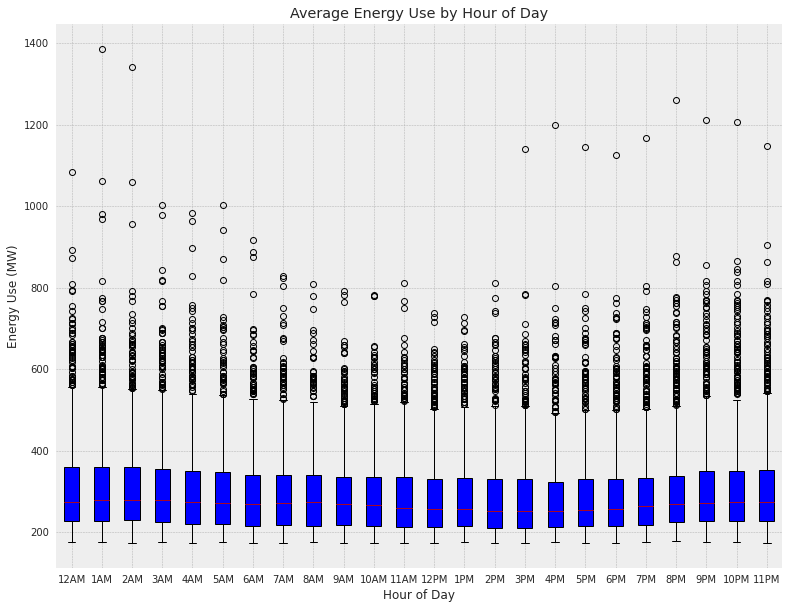

In [ ]:
Y = df
def by_hour(Y) :
    # Acquire distributions of energy consumption for each hour of day
    midnite=Y.at_time('00:00') 
    one_am=Y.at_time('01:00') 
    two_am=Y.at_time('02:00') 
    three_am=Y.at_time('03:00') 
    four_am=Y.at_time('04:00') 
    five_am=Y.at_time('05:00') 
    six_am=Y.at_time('06:00') 
    seven_am=Y.at_time('07:00') 
    eight_am=Y.at_time('08:00') 
    nine_am=Y.at_time('09:00') 
    ten_am=Y.at_time('10:00') 
    eleven_am=Y.at_time('11:00') 
    noon=Y.at_time('12:00') 
    one_pm=Y.at_time('13:00') 
    two_pm=Y.at_time('14:00') 
    three_pm=Y.at_time('15:00') 
    four_pm=Y.at_time('16:00') 
    five_pm=Y.at_time('17:00') 
    six_pm=Y.at_time('18:00') 
    seven_pm=Y.at_time('19:00') 
    eight_pm=Y.at_time('20:00') 
    nine_pm=Y.at_time('21:00') 
    ten_pm=Y.at_time('22:00') 
    eleven_pm=Y.at_time('23:00')
    
    #specify plot will contain subplots, here there are 24 subplots
    fig, ax = plt.subplots(figsize=(13, 10)) 
    data_to_plot = [midnite['electricity_consumption'], one_am['electricity_consumption'],
                    two_am['electricity_consumption'], three_am['electricity_consumption'],
                    four_am['electricity_consumption'], five_am['electricity_consumption'],
                    six_am['electricity_consumption'], seven_am['electricity_consumption'],
                    eight_am['electricity_consumption'], nine_am['electricity_consumption'],
                    ten_am['electricity_consumption'], eleven_am['electricity_consumption'],
                    noon['electricity_consumption'], one_pm['electricity_consumption'],
                    two_pm['electricity_consumption'], three_pm['electricity_consumption'],
                    four_pm['electricity_consumption'], five_pm['electricity_consumption'],
                    six_pm['electricity_consumption'], seven_pm['electricity_consumption'],
                    eight_pm['electricity_consumption'], nine_pm['electricity_consumption'],
                    ten_pm['electricity_consumption'], eleven_pm['electricity_consumption']]
    labels=['12AM', '1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM',
            '10AM','11AM','12PM', '1PM','2PM','3PM','4PM','5PM','6PM','7PM',
            '8PM','9PM','10PM','11PM']
    # plot data as box and whisker plot
    ax.boxplot(data_to_plot, vert=True, patch_artist=True, labels=labels)
    plt.xlabel('Hour of Day')
    plt.ylabel('Energy Use (MW)')
    plt.title('Average Energy Use by Hour of Day')
    plt.show()

by_hour(Y)

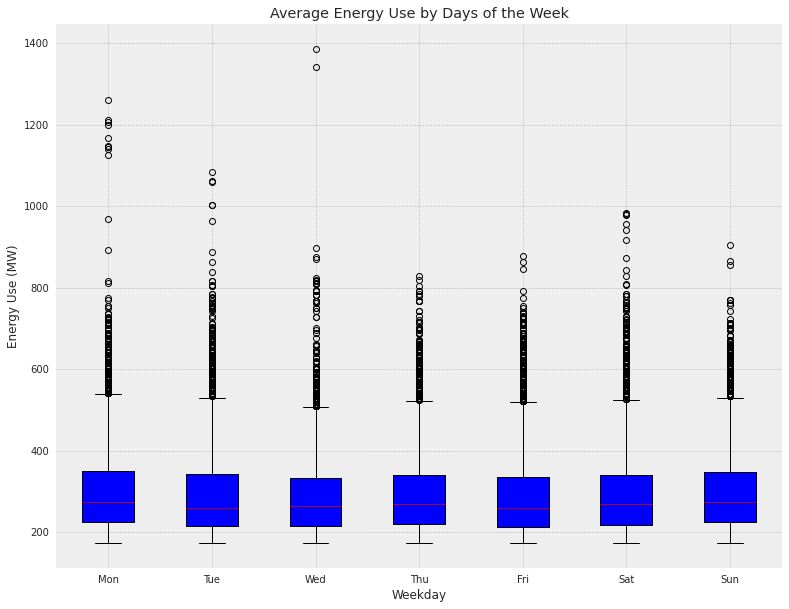

In [ ]:
Y['Day'] = Y.index.dayofweek
mon = Y[Y['Day']== 0]
tue = Y[Y['Day']== 1]
wed = Y[Y['Day']== 2]
thu = Y[Y['Day']== 3]
fri = Y[Y['Day']== 4]
sat = Y[Y['Day']== 5]
sun = Y[Y['Day']== 6]
fig, ax = plt.subplots(figsize=(13, 10))
data_to_plot=[mon['electricity_consumption'], tue['electricity_consumption'], wed['electricity_consumption'],
            thu['electricity_consumption'], fri['electricity_consumption'], sat['electricity_consumption'],
            sun['electricity_consumption']]
labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.boxplot(data_to_plot, vert=True, patch_artist=True, labels=labels)
plt.xlabel('Weekday')
plt.ylabel('Energy Use (MW)')
plt.title('Average Energy Use by Days of the Week')
plt.show()

In [ ]:
monavg = np.mean(mon['electricity_consumption'])
tueavg = np.mean(tue['electricity_consumption'])
wedavg = np.mean(wed['electricity_consumption'])
thuavg = np.mean(thu['electricity_consumption'])
friavg = np.mean(fri['electricity_consumption'])
satavg = np.mean(sat['electricity_consumption'])
sunavg = np.mean(sun['electricity_consumption'])

In [ ]:
stddev = np.std([monavg, tueavg, wedavg, thuavg, friavg])
print('Standard Deviation of Mon-Fri: ', stddev)
stddev = np.std([satavg, sunavg])
print('Standard Deviation of Sat-Sun: ', stddev)

Standard Deviation of Mon-Fri:  5.3591502920701615
Standard Deviation of Sat-Sun:  2.445223750405688


>>
And if the weekdays uses less energy than weekends, then the standard deviation of all day-of-week averages should be lower than when they were grouped.

In [ ]:
stddev = np.std([monavg, tueavg, wedavg, thuavg, friavg, satavg, sunavg])
print('Standard Deviation of Mon-Sun: ', stddev)

Standard Deviation of Mon-Sun:  5.1427170771179425


>>
This gives us reason to believe that the weekends typically have Higher energy use than weekdays.

### Pearson Correlation Coefficient

>>
Pearson's Correlation Coefficient helps to find out the relationship between two quantities.

In [ ]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

index  temperature  ...          Peak       Weekend
index                    1.000000     0.073371  ... -7.395802e-04  4.586428e-03
temperature              0.073371     1.000000  ... -2.196599e-01 -3.445725e-03
var1                     0.055120     0.811421  ...  3.168762e-02 -1.214215e-02
pressure                -0.010894    -0.723939  ...  2.251398e-02 -1.788813e-04
windspeed               -0.081506    -0.162093  ... -3.609375e-02  3.966306e-02
var2                     0.006932    -0.039322  ... -5.649289e-03 -2.031855e-04
electricity_consumption -0.008899    -0.117254  ...  4.913254e-02 -1.900276e-02
Hour                     0.000905     0.154194  ... -8.172063e-01  3.756949e-20
Day                      0.000092     0.001283  ... -4.414140e-17 -7.906411e-01
Month                   -0.127178    -0.185422  ...  6.578845e-19  4.653013e-03
Year                     0.972272     0.112785  ... -3.203486e-17  3.278733e-03
Q                       -0.145237    -0.186927  ...  8.709506e-18  3.591672e-03
Dayofyear               -0.123989    -0.182614  ... -1.445627e-17  4.470492e-03
Dayofmonth               0.020814    -0.009646  ...  5.360062e-20 -2.421504e-03
Weekofyear              -0.129252    -0.167043  ... -1.412137e-17  6.348025e-03
Holiday                  0.017502    -0.013131  ... -1.416793e-17  4.600859e-03
Work                    -0.000740    -0.219660  ...  1.000000e+00 -1.272305e-17
Peak                    -0.000740    -0.219660  ...  1.000000e+00 -1.272305e-17
Weekend                  0.004586    -0.003446  ... -1.272305e-17  1.000000e+00

[19 rows x 19 columns]

### R Squared Correlation

>>
Like correlation, R² tells you how related two things are. However, we tend to use R² because it’s easier to interpret. R² is the percentage of variation (i.e. varies from 0 to 1) explained by the relationship between two variables.

In [ ]:
import scipy
RConsumption = {}
h = ['datetime','electricity_consumption']
for col in df.columns:
  if( col not in h):
    slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(df['electricity_consumption'], df[col])
    RConsumption[col] = r_value**2
print('DEMAND CORRELATIONS (r^2) FOR HOMESTEAD')

cons_df = pd.DataFrame(RConsumption.items(), columns=['Features', 'r**2'])
cons_df.sort_values(['r**2'], ascending=False)

DEMAND CORRELATIONS (r^2) FOR HOMESTEAD


Features          r**2
4     windspeed  5.706505e-02
2          var1  1.793283e-02
1   temperature  1.374850e-02
12   Dayofmonth  9.596925e-03
10            Q  2.558151e-03
16         Peak  2.414006e-03
15         Work  2.414006e-03
11    Dayofyear  2.166563e-03
13   Weekofyear  1.891069e-03
8         Month  1.661453e-03
14      Holiday  4.858659e-04
6          Hour  4.581254e-04
9          Year  3.947586e-04
17      Weekend  3.611049e-04
0         index  7.919861e-05
5          var2  2.242213e-05
3      pressure  8.219949e-07
7           Day  1.294018e-07

## Implementing the solution

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

>>
Time series models are used to forecast future events based on previous events that have been observed (and data collected) at regular time intervals.
>>
The techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.

>**Goals of time series analysis**
>>
* Identifying the nature of the phenomenon represented by the sequence of observations.
* Forecasting (predicting future values of the time series variable)

### Seasonality

>>
In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

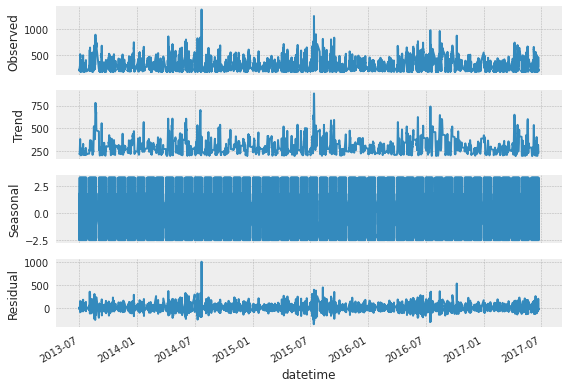

In [ ]:
# Separating Trend and Seasonality fr
#
s=sm.tsa.seasonal_decompose(df.electricity_consumption, freq=30)
s.plot()
plt.show()

>> 
We clearly see that the trend in electricity consumption is almost stationary as it neither increases nor decreases on average across the 5 years.
>>
Let us confirm this by checking the stationarity of the data.

### Autocorrelation and Partial Autocorrelation

>>
Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

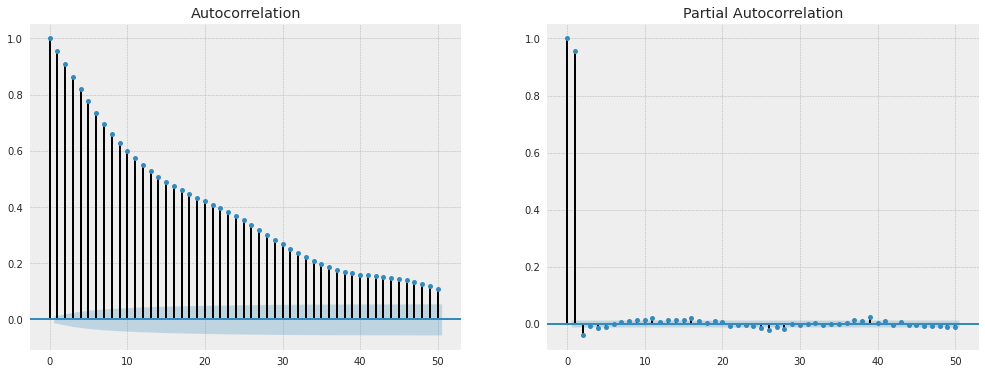

In [ ]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(17,6))


fig = sm.graphics.tsa.plot_acf(df['electricity_consumption'], lags=50, ax=axes[0])

fig = sm.graphics.tsa.plot_pacf(df['electricity_consumption'], lags=50, ax=axes[1])
plt.show()

>>
We can notice from the above chart that after 50 lags, the line doesn't get inside confidence interval (light blue area). This means that our data does not have seasonality.

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

X = df.drop(['electricity_consumption'], axis=1)
y = df['electricity_consumption']

model = OLS(y, X)
res = model.fit()
print(res.summary())


                               OLS Regression Results                              
Dep. Variable:     electricity_consumption   R-squared:                       0.246
Model:                                 OLS   Adj. R-squared:                  0.246
Method:                      Least Squares   F-statistic:                     541.3
Date:                     Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                             08:17:06   Log-Likelihood:            -1.5791e+05
No. Observations:                    26496   AIC:                         3.159e+05
Df Residuals:                        26479   BIC:                         3.160e+05
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


### Stationarity

#### **ADF (Augmented Dickey-Fuller) Test**

>>
ADF is used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not.
>>
* Null Hypothesis: The series has a unit root (value of a =1)
* Alternate Hypothesis: The series has no unit root.

>>
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.
>>
If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['electricity_consumption'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -17.591909019062896
2. P-Value :  3.96009950032467e-30
3. Num Of Lags :  38
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 26457
5. Critical Values :
	 1% :  -3.4305971910865534
	 5% :  -2.861649251241277
	 10% :  -2.566828151195233


>>
We can interpret above results based on p-values of result.
>>
* p-value > 0.05 - This implies that time-series is non-stationary.
* p-value <=0.05 - This implies that time-series is stationary.

>>
We can see from the above results that p-value is lower than 0.05 hence our time-series has stationary. Therefore the time series is good to build a prediction model. 

In [ ]:
consumption = df['electricity_consumption'].resample('MS').mean()

**KPSS test**

> Reading Resource:- Stationarity and detrending using <a href="https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html">KPSS</a>

>>
KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.
>>
* Null Hypothesis: The process is trend stationary.
>>
* Alternate Hypothesis: The series has a unit root (series is not stationary).
>>
* A function is created to carry out the KPSS test on a time series.

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df['electricity_consumption'])

Results of KPSS Test:
Test Statistic            0.100497
p-value                   0.100000
Lags Used                49.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



>>
We can see from the above results that p-value is lower than 0.05 hence our time-series has stationary. Therefore the time series is good to build a prediction model. 

### Applying Moving Window Functions

>>
Moving window functions refers to functions that can be applied to time-series data by moving fixed/variable size window over total data and computing descriptive statistics over window data each time. Here window generally refers to a number of samples taken from total time series in order and represents a particular represents a period of time.
>>
There are 2 kinds of window functions:
>>
* Rolling Window Functions: It performs aggregate operations on the window with the same amount of sample each time.
* Expanding Window Functions: It performs aggregate operations on the window which expands with time.

>>
We will be using the Rolling Windows Function in this project.

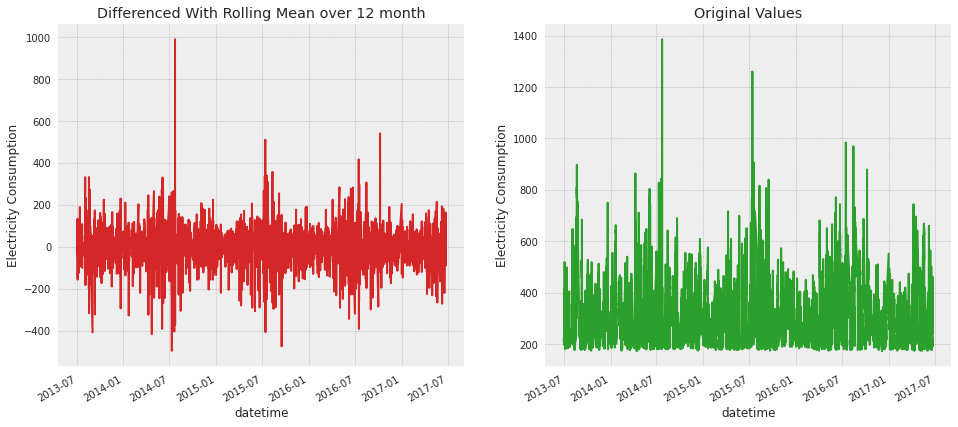

In [ ]:
rolling_mean = df['electricity_consumption'].rolling(window = 12).mean()
consumption_rolled_detrended = df['electricity_consumption'] - rolling_mean

ax1 = plt.subplot(121)
consumption_rolled_detrended.plot(figsize=(16,7),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
plt.ylabel("Electricity Consumption")
ax2 = plt.subplot(122)
df['electricity_consumption'].plot(figsize=(16,7), color="tab:green", title="Original Values", ax=ax2);
plt.ylabel("Electricity Consumption")
plt.show()

>>
From the above the first chart, we can see that we seem to have removed trend from time-series data.
>>
We can check whether we are successful or not by checking individual components of time-series by decomposing it as we had done above.

In [ ]:
# specify training data
data = pd.DataFrame(df['electricity_consumption'])
data.head(3)

electricity_consumption
datetime                                    
2013-07-01 00:00:00                    216.0
2013-07-01 01:00:00                    210.0
2013-07-01 02:00:00                    225.0

## Univariate Time Series

### ARIMA Model

>>
An autoregressive integrated moving average, or <a href="https://r.search.yahoo.com/_ylt=AwrIS.iv3TRfec0AnQN3Bwx.;_ylu=X3oDMTByZmVxM3N0BGNvbG8DaXIyBHBvcwMxBHZ0aWQDBHNlYwNzYw--/RV=2/RE=1597328943/RO=10/RU=https%3a%2f%2fwww.investopedia.com%2fterms%2fa%2fautoregressive-integrated-moving-average-arima.asp%23%3a~%3atext%3dAn%2520autoregressive%2520integrated%2520moving%2520average%252C%2520or%2520ARIMA%252C%2520is%2cthe%2520data%2520set%2520or%2520to%2520predict%2520future%2520trends./RK=2/RS=g_sZ71rBNjz2dhvp40PruW5G5gs-">ARIMA</a>, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.

---



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



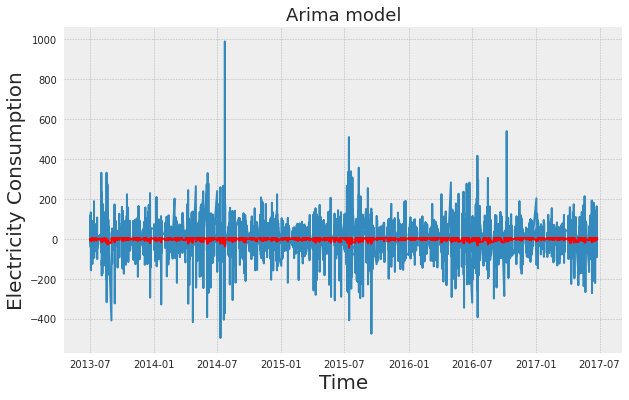

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# Moving Average Model.
#
figure, ax = plt.subplots(figsize=(10,6))
model = ARIMA(df['electricity_consumption'], order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(consumption_rolled_detrended)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.xlabel("Time", fontsize="20")
plt.ylabel("Electricity Consumption", fontsize="20")
plt.title("Arima model", fontsize="18")
plt.show()

>>
First get the predicted values and store it as series.

In [ ]:
pred_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pred_ARIMA.tail())

datetime
2017-06-23 19:00:00    3.889901
2017-06-23 20:00:00    3.737177
2017-06-23 21:00:00    3.638437
2017-06-23 22:00:00    3.791976
2017-06-23 23:00:00    3.890214
dtype: float64


>>
Now convert differencing to log scale: find the cumulative sum and add it to a new series with a base value (here the first-month value of the log series).

In [ ]:
pred_ARIMA_diff = pd.Series(pred_ARIMA.cumsum(), copy=True)
print(pred_ARIMA_diff.tail())

datetime
2017-06-23 19:00:00   -2701.808598
2017-06-23 20:00:00   -2698.071420
2017-06-23 21:00:00   -2694.432983
2017-06-23 22:00:00   -2690.641007
2017-06-23 23:00:00   -2686.750792
dtype: float64


>>
Next -take the exponent of the series from above (anti-log) which will be the predicted value — the time series forecast model.

In [ ]:
pred_ARIMA_log = pd.Series(consumption[0], index=consumption.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff, fill_value=0)
print(pred_ARIMA_log.tail())

datetime
2017-06-23 19:00:00   -2701.808598
2017-06-23 20:00:00   -2698.071420
2017-06-23 21:00:00   -2694.432983
2017-06-23 22:00:00   -2690.641007
2017-06-23 23:00:00   -2686.750792
dtype: float64


>>
Now plot the predicted values with the original.

RMSE: nan


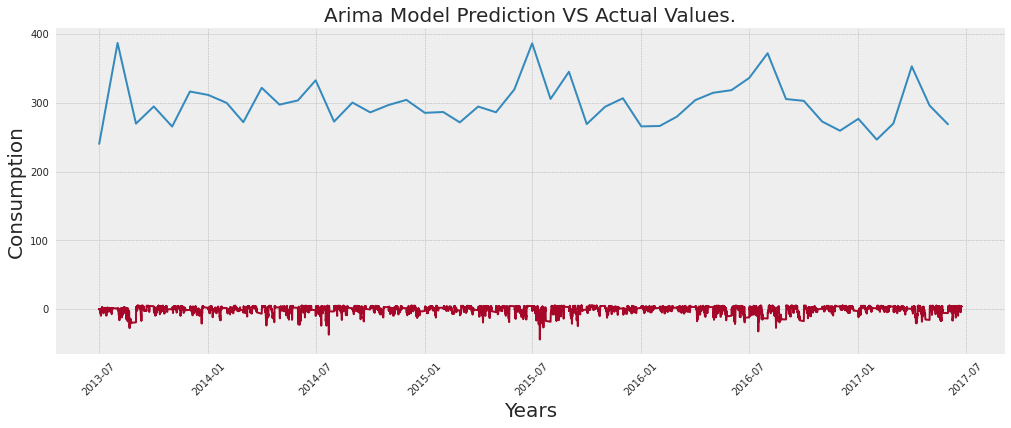

In [ ]:
pred_ARIMA_log = np.exp(pred_ARIMA_log)

figure, ax = plt.subplots(figsize=(17,6))
plt.plot(consumption)
plt.plot(pred_ARIMA)
print(f"RMSE: {np.sqrt(sum((pred_ARIMA-consumption)**2)/len(consumption))}")
plt.xlabel("Years", fontsize="20")
plt.ylabel("Consumption", fontsize="20")
plt.title("Arima Model Prediction VS Actual Values.", fontsize="20")
plt.xticks(rotation="45")
plt.show()

>>
ARIMA performs poorly because the predictions(line in red) are way off from the actual values.
>>
Let's try and implement SARIMA model and compare it's performance to ARIMA.

### SARIMA

In [ ]:
# Load the SARIMAX Library.
#
from statsmodels.tsa.statespace.sarimax import SARIMAX

<a href="https://meet.google.com/linkredirect?authuser=0&dest=https%3A%2F%2Fmachinelearningmastery.com%2Ftime-series-forecasting-methods-in-python-cheat-sheet%2F">Further SARIMAX Reading Resources</a>

In [ ]:

#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(consumption,
                                order=(0, 1, 1),
                                seasonal_order=(2, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 3.639172
         Iterations: 4
         Function evaluations: 264
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.442     -2.261      0.024      -1.867      -0.133
ar.S.L12       0.0935      0.288      0.324      0.746      -0.471       0.658
ar.S.L24      -0.6759      0.179     -3.775      0.000      -1.027      -0.325
sigma2       747.5353      0.001   1.26e+06      0.000     747.534     747.536


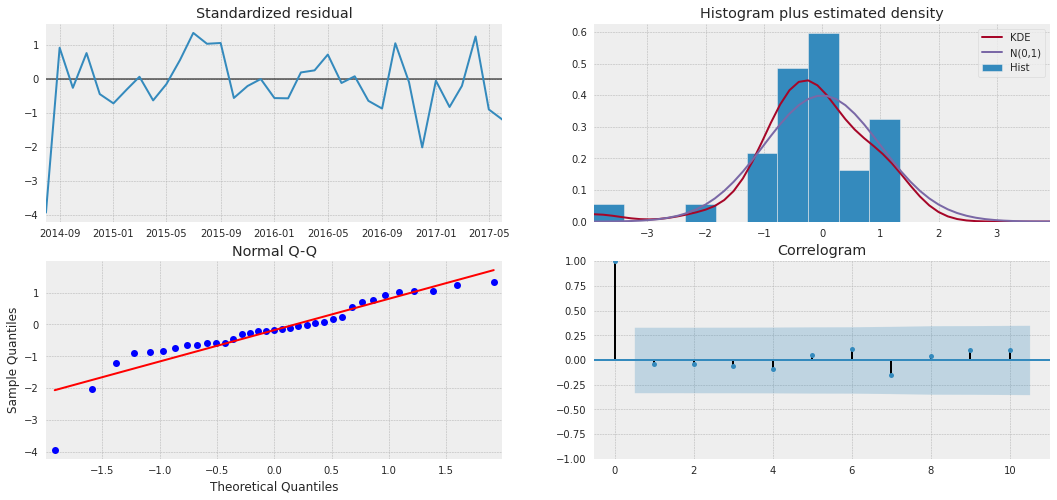

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

>>
Residual indeed is the difference between true and predicted value. If there are correlations between residuals - there is information left in the residuals which should be used in computing forecasts. If the residuals have a mean other than zero, then the forecasts are biased.
>>
Parameters: If you look at the <a href="http://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html">package documentation</a> you will see that these parameters are used to ENFORCE stationarity or invertibility. If the data is stationary and the AR parameters are chosen correctly (since you should have done some previous data preprocessing) why should we do it again? Same stands for invertibility

**Make Predictions and Plot the chart**

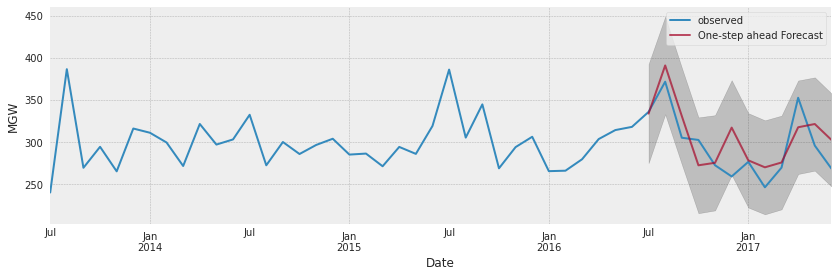

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = consumption.plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('MGW')
plt.legend()
plt.show()


> **Disadvantages**
>>
It is a univariate time series model, hence it can only allow for one feature variable.
>>
**NB**
>>
However it might be very useful and might provide you with more insights concerning your dependent variable. in our case(Electricity Consumption).

## Multivariate Time Series

### VARMAX

> The VARMAX class in statsmodels allows estimation of VAR, VMA, and VARMA models (through the order argument), optionally with a constant term (via the trend argument).

#### Vector Autoregression(VAR)

>>
The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

In [ ]:
X = df.drop(['electricity_consumption'],axis=1)

In [ ]:
exog = df['electricity_consumption']
mod = sm.tsa.VARMAX(df[['temperature', 'pressure', 'windspeed', 'Hour']], order=(2,0), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                          Statespace Model Results                                          
Dep. Variable:     ['temperature', 'pressure', 'windspeed', 'Hour']   No. Observations:                26496
Model:                                                      VARX(2)   Log Likelihood             -382073.661
Date:                                              Mon, 17 Aug 2020   AIC                         764239.322
Time:                                                      08:29:20   BIC                         764615.821
Sample:                                                           0   HQIC                        764360.844
                                                            - 26496                                         
Covariance Type:                                                opg                                         
Ljung-Box (Q):          8754.10, 8933.24, 33.36, 30082.99   Jarque-Bera (JB):   172.22, 150.75, 75164571.17, 261229.79
Prob(Q): 

> From the estimated VAR model, we can plot the impulse response functions of the endogenous variables.

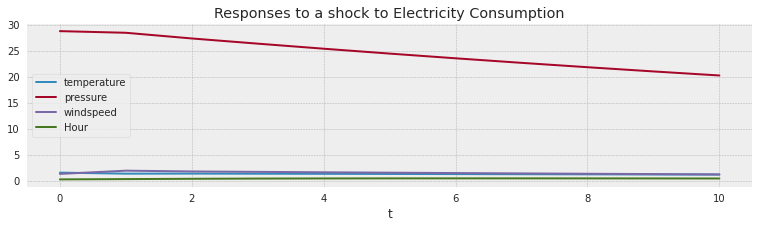

In [ ]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to Electricity Consumption');

> **Disadvantages**
>>
It also takes a long time to train the model.
>>
The more the number of features the longer the model takes to train.
>>
However it might be very useful when dealing with fewer feature variables.

#### Vector Moving Average(VMA)

> We leave out the exogenous regressor but now include the constant term.

In [ ]:
mod = sm.tsa.VARMAX(df[['temperature', 'pressure', 'windspeed']], order=(0,2), error_cov_type='diagonal')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



> **Disadvantages**
>>
It also takes a long time to train the model.
>>
The more the number of features the longer the model takes to train.
>>
However it might be very useful when dealing with fewer feature variables.

#### Vector Autoregression Moving-Average(VARMA)

>>
The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

In [ ]:
mod = sm.tsa.VARMAX(df[['temperature', 'pressure', 'windspeed']], order=(1,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

**N.B**
>>
We would not advice to use VARMA since the (p,q) parameters are difficult to set for a good model performance.

> **Disadvantages**
>>
It also takes a long time to train the model.
>>
The more the number of features the longer the model takes to train.
>>
However it might be very useful when dealing with fewer feature variables.

### XGBoost Model

**Data Splitting**

In [ ]:
def split_data( data, split_date ):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

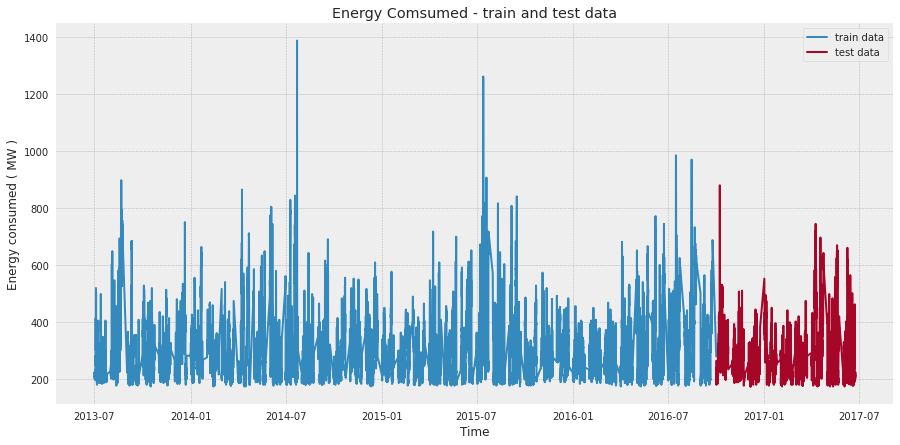

In [ ]:
train, test = split_data(df, '01-Oct-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Time')
plt.ylabel('Energy consumed ( MW )')
plt.plot(train.index,train['electricity_consumption'], label='train data' )
plt.plot(test.index,test['electricity_consumption'], label='test data')
plt.title( 'Energy Comsumed - train and test data' )
plt.legend()
plt.show()

In [ ]:
X_train = train
y_train = train['electricity_consumption']
X_test = test
y_test = test['electricity_consumption']
X_train.drop( columns = 'electricity_consumption', inplace = True )
X_test.drop( columns = 'electricity_consumption', inplace = True )

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.shape

(4967, 1)

**Applying XGBoost Model**

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(  n_estimators = 250,
                           max_depth= 5,
                           learning_rate= 0.069,
                           subsample=1,
                           colsample_bytree=1)

>>
For fine-tune the model, the hyper parameters are tried with reasonable values.
>>
Based on the MSE, the best suitable parmeters are set.


In [ ]:
model.fit( X_train, y_train,
           eval_set=[ ( X_train, y_train ), ( X_test, y_test )],
           early_stopping_rounds = 100, # stop if 50 consequent rounds without decrease of error
           verbose = True ) # Change verbose to True if you want to see it train
           

[10:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:300.968	validation_1-rmse:277.21
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:282.198	validation_1-rmse:258.921
[2]	validation_0-rmse:264.866	validation_1-rmse:249.361
[3]	validation_0-rmse:248.702	validation_1-rmse:233.579
[4]	validation_0-rmse:233.796	validation_1-rmse:225.052
[5]	validation_0-rmse:220.051	validation_1-rmse:216.906
[6]	validation_0-rmse:207.332	validation_1-rmse:203.642
[7]	validation_0-rmse:195.575	validation_1-rmse:191.85
[8]	validation_0-rmse:184.81	validation_1-rmse:181.293
[9]	validation_0-rmse:174.939	validation_1-rmse:170.124
[10]	validation_0-rmse:165.765	validation_1-rmse:161
[11]	validation_0-rmse:157.379	validation_1-rmse:152.785
[12]	validation_0-rmse:149.784	validation_1-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.069, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**Predicting using test data**

In [ ]:
X_test_pred = model.predict(X_test)
X_test_pred = pd.DataFrame(X_test_pred)
X_test_pred.columns = ['Predictions']
X_test_pred

Predictions
0      232.904205
1      275.941956
2      260.814941
3      261.100494
4      228.843979
...           ...
4962   218.071747
4963   290.218536
4964   247.902405
4965   290.218536
4966   290.218536

[4967 rows x 1 columns]

In [ ]:
y_test = pd.DataFrame(y_test_df, index=None)
y_test.columns = ['Actual']
y_test.tail(10)

Actual
datetime                   
2017-06-23 14:00:00   204.0
2017-06-23 15:00:00   201.0
2017-06-23 16:00:00   201.0
2017-06-23 17:00:00   222.0
2017-06-23 18:00:00   216.0
2017-06-23 19:00:00   225.0
2017-06-23 20:00:00   213.0
2017-06-23 21:00:00   213.0
2017-06-23 22:00:00   210.0
2017-06-23 23:00:00   210.0

In [ ]:
result = pd.merge(y_test_df, X_test_pred, on=y_test_df.index)
result.columns = ['Date', 'Actual',	'Predictions']
result

Date  Actual  Predictions
0    2016-10-01 01:00:00   264.0   232.904205
1    2016-10-01 02:00:00   252.0   275.941956
2    2016-10-01 03:00:00   231.0   260.814941
3    2016-10-01 04:00:00   246.0   261.100494
4    2016-10-01 05:00:00   252.0   228.843979
...                  ...     ...          ...
4962 2017-06-23 19:00:00   225.0   218.071747
4963 2017-06-23 20:00:00   213.0   290.218536
4964 2017-06-23 21:00:00   213.0   247.902405
4965 2017-06-23 22:00:00   210.0   290.218536
4966 2017-06-23 23:00:00   210.0   290.218536

[4967 rows x 3 columns]

**Measure the Mean Square Error**

In [ ]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_true=y_test,
                   y_pred=X_test_pred))

82.44355199009715

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(y_test,X_test_pred)
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: 19.42774533269666%


**Plot the predicitions**

In [ ]:
def plot_performance(base_data, test_data, test_pred, date_from, date_to, title=None):
    plt.figure(figsize=(15,6))
    if title == None:
        plt.title('From {0} To {1}'.format(date_from, date_to))
    else:
        plt.title( title )
    plt.xlabel( 'Time' )
    plt.ylabel( 'Energy consumed ( MW )' )
    plt.plot( base_data.index,base_data['electricity_consumption'], label='data' )
    plt.plot( test_data.index, test_pred, label='prediction' )
    plt.xlim( left=date_from, right=date_to )
    plt.legend()

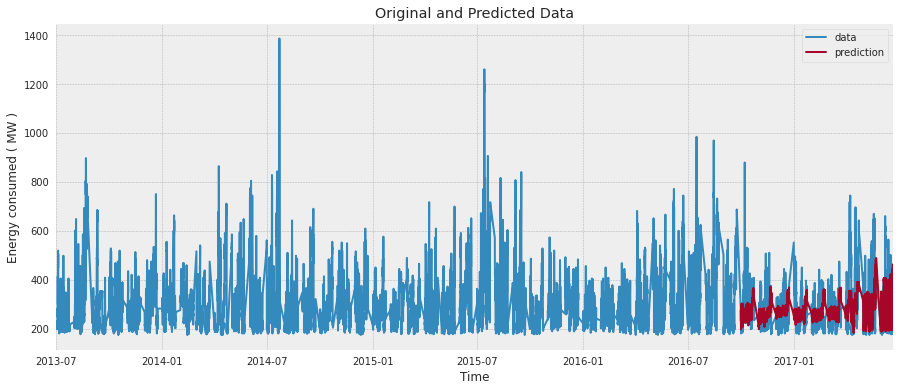

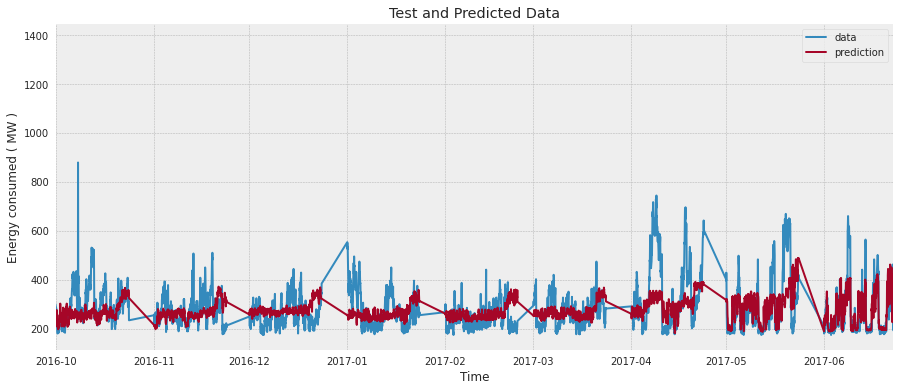

In [ ]:
plot_performance(data, X_test, X_test_pred, data.index[0].date(), data.index[-1].date(),
                 'Original and Predicted Data')

plot_performance(data, X_test, X_test_pred, y_test.index[0].date(), y_test.index[-1].date(),
                 'Test and Predicted Data')



plt.show()

**Feature Importance**

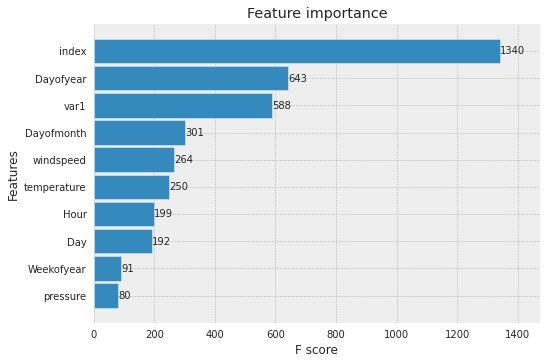

In [ ]:
xgb.plot_importance( model, height = 0.9, max_num_features= 10 )

>>
From the above chart, we can see the importance of the feature for our prediction in descending order.

**Drop Unnecessary columns**

>>
The columns we are dropping include: 
>>
* var2
* Month
* Q
* Peak
* Weekend

In [ ]:
df.drop(['var2', 'Month', 'Q', 'Peak', 'Weekend'], axis=1, inplace=True)
df.columns

Index(['index', 'temperature', 'var1', 'pressure', 'windspeed',
       'electricity_consumption', 'Hour', 'Day', 'Year', 'Dayofyear',
       'Dayofmonth', 'Weekofyear', 'Holiday', 'Work'],
      dtype='object')

**Split the data into Train and Test**

In [ ]:
train2, test2 = split_data( df, '01-Oct-2016')
X_train2 = train2
y_train2 = train2['electricity_consumption']
X_test2 = test2
y_test2 = test2['electricity_consumption']
X_train2.drop( columns = 'electricity_consumption', inplace = True )
X_test2.drop( columns = 'electricity_consumption', inplace = True )

**XGB**

In [ ]:
# Initialize XGBRegressor Model.
#
model = xgb.XGBRegressor(  n_estimators = 250,
                           max_depth= 5,
                           learning_rate= 0.069,
                           subsample=1,
                           colsample_bytree=1)

**Fit Model After dropping Unnecessary columns**

In [ ]:
model.fit( X_train2, y_train2,
           eval_set=[ ( X_train2, y_train2), ( X_test2, y_test2 )],
           early_stopping_rounds = 100, # stop if 50 consequent rounds without decrease of error
           verbose = True ) # Change verbose to True if you want to see it train
           

[10:03:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:300.968	validation_1-rmse:277.21
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:282.198	validation_1-rmse:258.921
[2]	validation_0-rmse:264.866	validation_1-rmse:249.361
[3]	validation_0-rmse:248.702	validation_1-rmse:233.579
[4]	validation_0-rmse:233.796	validation_1-rmse:225.052
[5]	validation_0-rmse:220.051	validation_1-rmse:216.906
[6]	validation_0-rmse:207.332	validation_1-rmse:203.642
[7]	validation_0-rmse:195.575	validation_1-rmse:191.85
[8]	validation_0-rmse:184.81	validation_1-rmse:181.293
[9]	validation_0-rmse:174.939	validation_1-rmse:170.124
[10]	validation_0-rmse:165.765	validation_1-rmse:161
[11]	validation_0-rmse:157.379	validation_1-rmse:152.785
[12]	validation_0-rmse:149.784	validation_1-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.069, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
X_test_pred_2 = model.predict(X_test2)
pd.DataFrame(X_test_pred_2).tail()

0
4962  218.071747
4963  290.218536
4964  247.902405
4965  290.218536
4966  290.218536

In [ ]:
y_test_2

NameError: ignored

**MSE**

In [ ]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_true=y_test2,
                   y_pred=X_test_pred_2))

82.44355199009715

**MAPE Function**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Mean Absolute Percentage Error**

In [ ]:
mape = mean_absolute_percentage_error(y_test,X_test_pred_2)
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: 25.614009587151187%


> We acheive a pretty good model with an MAPE of 19.43%. We could try and do more hyperparameter tuning and also try and implement a grid search, to see whether the model performance will improve.

**Plot Predictions After dropping Unnecessary Variables**

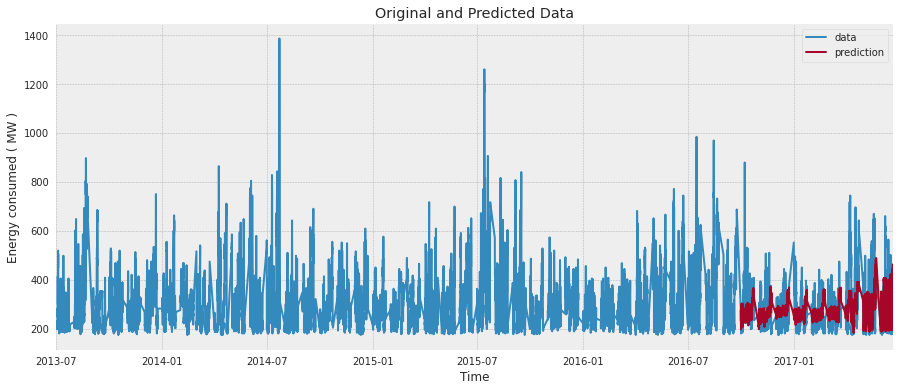

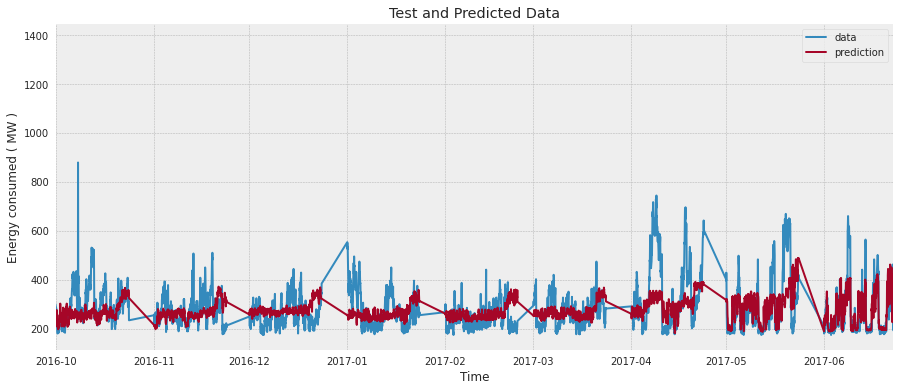

In [ ]:
plot_performance(data, X_test2, X_test_pred_2, data.index[0].date(), data.index[-1].date(),
                 'Original and Predicted Data')

plot_performance(data, X_test2, X_test_pred_2, y_test2.index[0].date(), y_test2.index[-1].date(),
                 'Test and Predicted Data')

plt.show()

>>
After dropping several unnecessary columns we still maintain the model performance but the time it takes to train the model reduces significantly.
>>
The Mean Absolute Percentage Error is similar with a value of 19.42 for both models, before and after dropping the unnecessary variables.


>***We could try and implement an LSTM model to see whether it would in turn have a better performance than the other models.***

### LSTM

>>
Sequential class model is a linear stack of Layers. You can create a Sequential model and define all of the layers in the constructor.
>>
We have used
>>
* 1.LSTM Layer
* 2.Dense Layer
>>

**Why we are using LSTM Layer?**
>>
Typical RNN uses information from the previous step to predict the output.But if only the previous step is not enough,that is long term dependency.If we use RNN using all previous steps ,the explosion/vanishing gradient problem is encountered.
>>
LSTM can solve this problem, because it uses gates to control the memorizing process.

> <font size="3">***Recurrent Neural Networks (RNN) are a class of Artificial Neural Networks that can process a sequence of inputs in deep learning and retain its state while processing the next sequence of inputs. Traditional neural networks will process an input and move onto the next one disregarding its sequence.***</font>

**LSTM MODEL**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
import math
import os

**Train Test Splits**

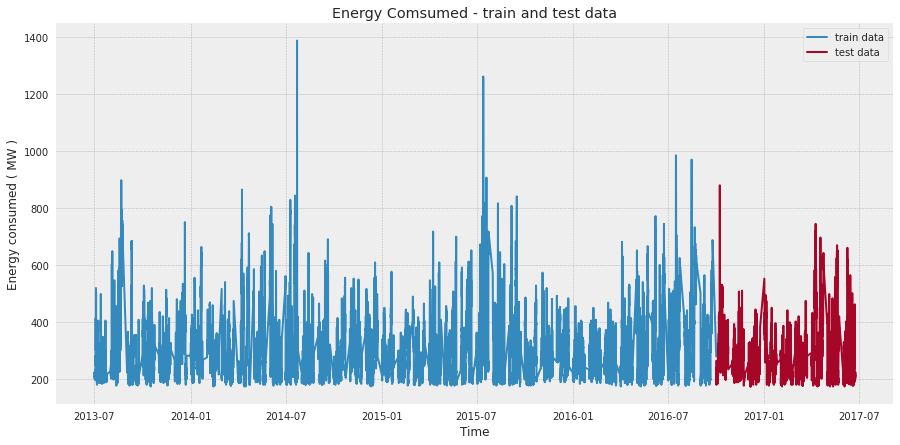

In [ ]:
train, test = split_data(df, '01-Oct-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Time')
plt.ylabel('Energy consumed ( MW )')
plt.plot(train.index,train['electricity_consumption'], label='train data' )
plt.plot(test.index,test['electricity_consumption'], label='test data')
plt.title( 'Energy Comsumed - train and test data' )
plt.legend()
plt.show()

In [ ]:

X_train = train
y_train = train['electricity_consumption']
X_test = test
y_test = test['electricity_consumption']
X_train.drop( columns = 'electricity_consumption', inplace = True )
X_test.drop( columns = 'electricity_consumption', inplace = True )



> Split the data into 80% Train and 20% Test

In [ ]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

21196 5300


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

>>
The code below splits the dataset into train and test sets, then splits the train and test sets into input and output variables. Finally, the inputs (X) are reshaped into the 3D format expected by LSTMs, namely [samples, timesteps, features].

In [ ]:
time_steps = 10
# reshape to [samples, time_steps, n_features]


X_train, y_train = create_dataset(train, train.electricity_consumption, time_steps)
X_test, y_test = create_dataset(test, test.electricity_consumption, time_steps)
print(X_train.shape, y_train.shape)

(21186, 10, 19) (21186,)


**Modeling**

>>
We’ll use the LSTM layer in a sequential model to make our predictions:
>>
We will define the LSTM with 128 neurons in the first hidden layer and 1 neuron in the output layer for predicting electricity consumption.

In [ ]:
# Initialize the lstm model.
#
model = keras.Sequential()


model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))

model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

>>
The LSTM layer expects the number of time steps and the number of features to work properly. The rest of the model looks like a regular regression model.

**Training**

The most important thing to remember when training Time Series models is to not shuffle the data (the order of the data matters).

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=68,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/30
281/281 [==============================] - 6s 21ms/step - loss: 96196.9219 - val_loss: 120908.0547
Epoch 2/30
281/281 [==============================] - 6s 20ms/step - loss: 89513.6875 - val_loss: 113057.5625
Epoch 3/30
281/281 [==============================] - 6s 20ms/step - loss: 82866.4766 - val_loss: 106179.2188
Epoch 4/30
281/281 [==============================] - 6s 20ms/step - loss: 76727.2422 - val_loss: 99906.7656
Epoch 5/30
281/281 [==============================] - 6s 20ms/step - loss: 71085.5156 - val_loss: 94356.2656
Epoch 6/30
281/281 [==============================] - 6s 20ms/step - loss: 65890.9766 - val_loss: 88908.8203
Epoch 7/30
281/281 [==============================] - 6s 20ms/step - loss: 61054.0195 - val_loss: 83767.3125
Epoch 8/30
281/281 [==============================] - 6s 20ms/step - loss: 56338.2930 - val_loss: 78551.1172
Epoch 9/30
281/281 [==============================] - 6s 20ms/step - loss: 51981.2266 - val_loss: 73846.0312
Epoch 10/30
281/

**Evaluation**

In [ ]:
y_pred = model.predict(X_test)

**Plot of Train loss and Test loss**

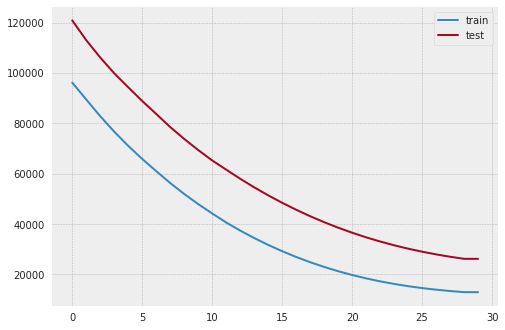

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 126.68996156020141


In [ ]:
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: 25.38466705115224%


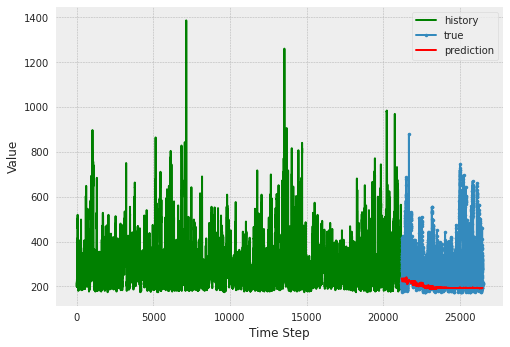

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

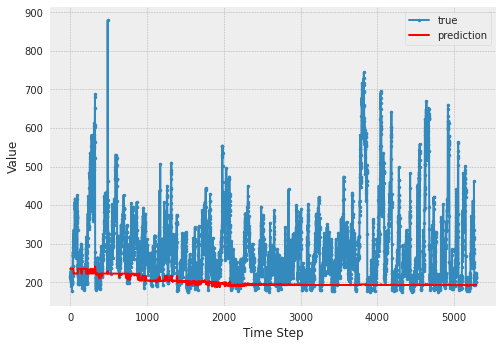

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Predicted']
y_pred

Predicted
0     234.655685
1     234.704346
2     234.645737
3     234.633652
4     234.647186
...          ...
5285  192.635284
5286  192.649841
5287  192.648682
5288  192.599457
5289  192.446777

[5290 rows x 1 columns]

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Actual']
y_test

Actual
0      213.0
1      216.0
2      213.0
3      204.0
4      228.0
...      ...
5285   225.0
5286   213.0
5287   213.0
5288   210.0
5289   210.0

[5290 rows x 1 columns]

In [ ]:
comparison_table = pd.concat([y_test, y_pred], axis=1)
comparison_table

Actual   Predicted
0      213.0  234.655685
1      216.0  234.704346
2      213.0  234.645737
3      204.0  234.633652
4      228.0  234.647186
...      ...         ...
5285   225.0  192.635284
5286   213.0  192.649841
5287   213.0  192.648682
5288   210.0  192.599457
5289   210.0  192.446777

[5290 rows x 2 columns]

## Challenging the Solution.

1. Was the data enough for analysis and forecasting electricity consumption?
> The data was enough for exploratory data analysis and also for building a prediction Time series model.
2. Was the data relevant to the problem at hand?
> The data provided was relevant since it had a huge number of rows and several columns, which once we did feature engineering, provided us with additional necessary variables.

## Conclusion

XGB model performed quite well with an
>>
* RMSE score of  82.44355199009715 
* MAPE of 19.4%

LSTM Performance:
>>
* RMSE score of  126.68996156020141 
* MAPE of 25.385%

>>
The reason as to why we decide to choose XGB as the main model for this project is because, XGB had a lower MAPE compared to LSTM.
>>
That said, we trust the XGBoost model performance more than LSTM model. 
>>
More Hyperparameter tuning and also cross validation can be done in a bid to reduce the Mean Percentage error of the model.